In [125]:
import os
import random
from PIL import Image

import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [126]:
dataset_dir = "./images_dataSAT"

In [127]:
dataset = datasets.ImageFolder(dataset_dir)

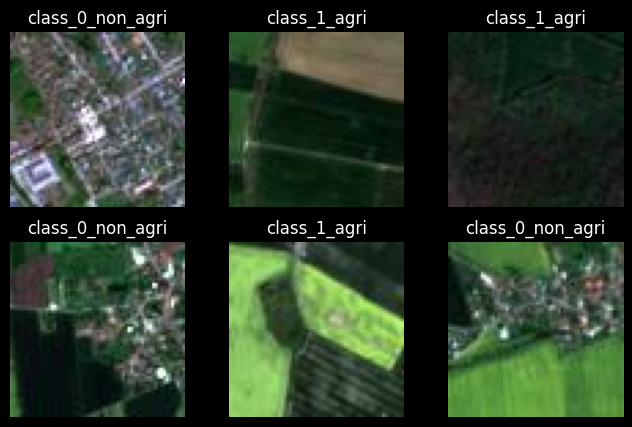

In [129]:
n_samples = 6

fig, axes = plt.subplots(nrows=2, ncols=n_samples//2, figsize=(8, 5))

for ax, (img, label) in zip(axes.flatten(), random.choices(dataset, k=n_samples)):
    ax.imshow(img)
    ax.set_title(dataset.classes[label])
    ax.axis("off")

In [130]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Training samples: 4800
Validation samples: 1200


In [131]:
img_size = 64

train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=0.2),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

In [132]:
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [133]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=5, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.BatchNorm2d(16),
    
    nn.Conv2d(16, 32, kernel_size=5, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.BatchNorm2d(32),
    
    nn.Conv2d(32, 16, kernel_size=5, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.BatchNorm2d(16),
    
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.BatchNorm1d(8),
    nn.Linear(8, len(dataset.classes)),
)